# Titanic_Regresion

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\RBC\Desktop\ML_projects\Linear_regresation\Titanic\svc.csv")

In [3]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [4]:
df_train=pd.read_csv(r"C:\Users\RBC\Desktop\ML_projects\Linear_regresation\Titanic\train.csv")
df_test=pd.read_csv(r"C:\Users\RBC\Desktop\ML_projects\Linear_regresation\Titanic\test.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


1. Of all passengers in df_train, how many survived, how many died ?

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


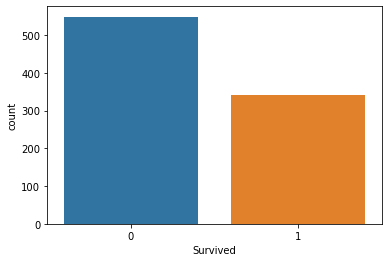

In [12]:
sns.countplot(x='Survived', data=df_train);

In [13]:
Total_survived=(df_train.Survived.sum()/df_train.shape[0])

In [14]:
Total_survived

0.3838383838383838

In [15]:
print("Total survived pasenger in percentage = ",Total_survived*100)

Total survived pasenger in percentage =  38.38383838383838


In [16]:
#consider total survived as 1 which is equal to 100%
Total_died=1-Total_survived
Total_died
print("Total Died passenger in percentage= ",Total_died*100)

Total Died passenger in percentage=  61.61616161616161


How many Female more likely to survive than male

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [19]:
df_train['Survived'][df_train['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [20]:
df_train['Survived'][df_train['Sex']=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

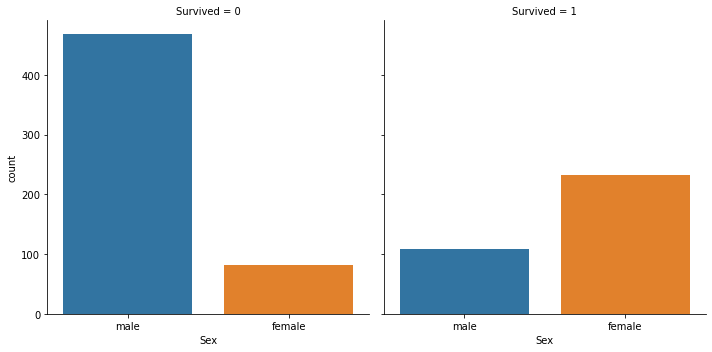

In [21]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [22]:
print("% of women Survived: ",df_train[df_train.Sex=='female'].Survived.sum()/df_train[df_train.Sex=='female'].shape[0] )

% of women Survived:  0.7420382165605095


In [23]:
print("% of male Survived: ",df_train[df_train.Sex=='male'].Survived.sum()/df_train[df_train.Sex=='male'].shape[0] )

% of male Survived:  0.18890814558058924


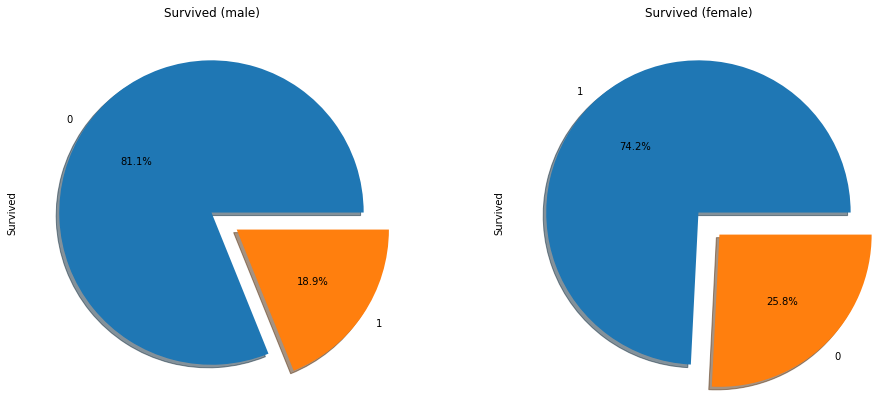

In [24]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Women were more likely to survive than men

74 % of women survived but only 19% of men (in training set)

second model : all women survived and all men died

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Survival rate decreases with Pclass how?????

In [26]:
#Findind detail of Pclass with the help of crosstab
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [27]:
#1st method to findout
print("% of survivals in :")
print("Pclass=1 : ",df_train['Survived'][df_train['Pclass']==1].sum()/df_train[df_train.Pclass==1].shape[0])
print("Pclass=2 : ",df_train['Survived'][df_train['Pclass']==2].sum()/df_train[df_train.Pclass==2].shape[0])
#2nd Method
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in :
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


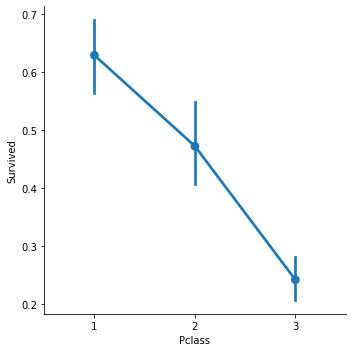

In [28]:
# To show in graps
sns.catplot('Pclass','Survived', kind='point', data=df_train);

3. How many men and women were died in Pclass??

In [29]:
# Number of survial and died in Pclass can be found with the help of crosstab
pd.crosstab([df_train.Survived,df_train.Sex], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

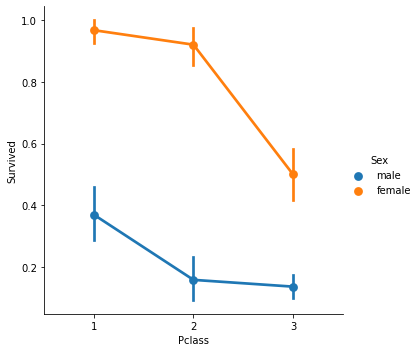

In [30]:
#Grap representing
sns.catplot('Pclass','Survived',hue="Sex",kind="point",data=df_train)

4 How Survival rate lowest for S and highest for C 

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


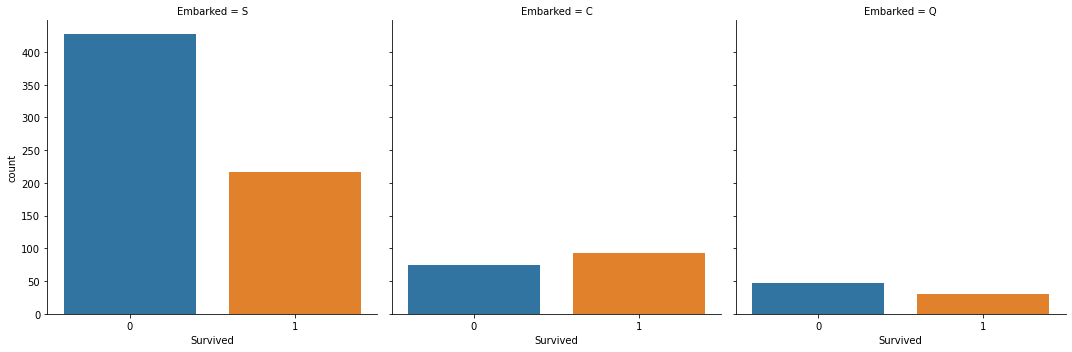

In [32]:
sns.catplot("Survived",col="Embarked",kind="count",data=df_train)

In [33]:
#Total number of surval embarked
df_train.groupby(['Survived','Embarked'])['Survived'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

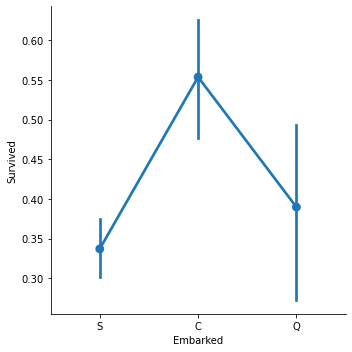

In [34]:
sns.catplot("Embarked","Survived",kind="point",data=df_train)

In [35]:
#Total survived in Embarked by %
print("Surviving rate of : ")
print("Surviving rate of C: ",df_train.Survived[df_train.Embarked=="C"].sum()/df_train['Survived'][df_train.Embarked=="C"].shape[0])
print("Surviving rate of Q: ",df_train.Survived[df_train.Embarked=="Q"].sum()/df_train['Survived'][df_train.Embarked=="Q"].shape[0])
print("Surviving rate of S: ",df_train.Survived[df_train.Embarked=="S"].sum()/df_train['Survived'][df_train.Embarked=="S"].shape[0])

Surviving rate of : 
Surviving rate of C:  0.5535714285714286
Surviving rate of Q:  0.38961038961038963
Surviving rate of S:  0.33695652173913043


Hence we can conclude that Surviving rate of S(0.337) is lower than surviving rate of C(0.554)

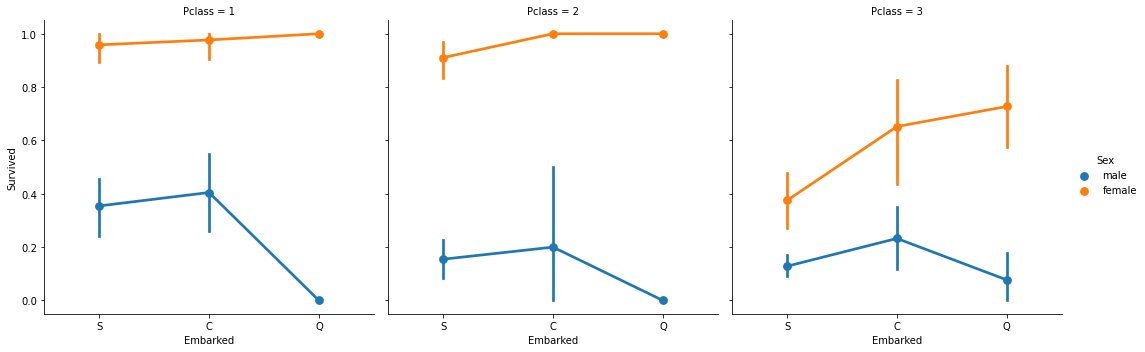

In [36]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train);

Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.

All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2

For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

In [37]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [38]:
#performing for df_test class
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

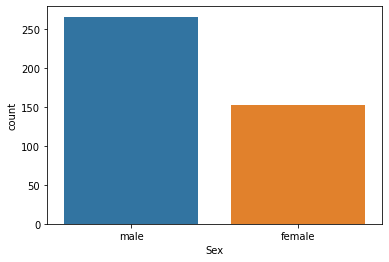

In [40]:
#checking of survival sex 
sns.countplot(x="Sex",data=df_test)

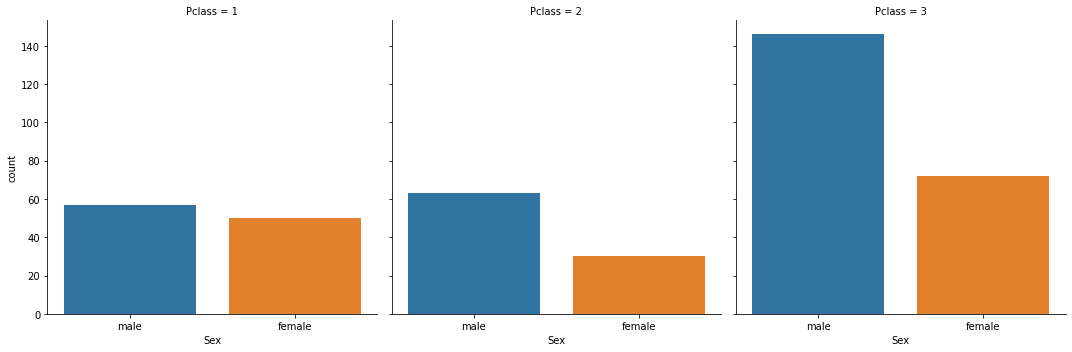

In [41]:
sns.catplot("Sex",col="Pclass",kind="count",data=df_test)

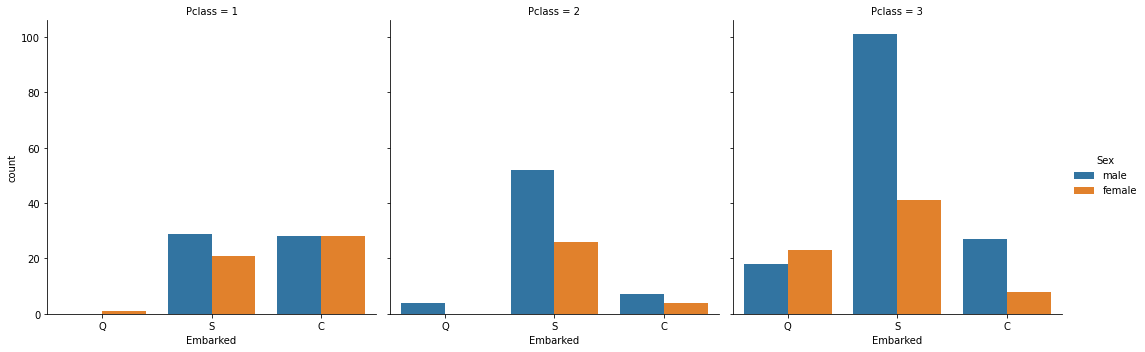

In [42]:
sns.catplot('Embarked', col='Pclass', hue= 'Sex', kind='count', data=df_test);

## Data Cleaning

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df_train["Age"].sum()/df_train.shape[0]

23.79929292929293

In [46]:
df_train["Cabin"].value_counts()/df_train.shape[0]

B96 B98        0.004489
G6             0.004489
C23 C25 C27    0.004489
C22 C26        0.003367
F33            0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: Cabin, Length: 147, dtype: float64

since cabin have 687 null value which is higher so we will drop this column form table 
and age is important for analysis so we will fill it by mean value

In [47]:
df_train_ml=df_train.copy()

In [48]:
df_train_ml.drop("Cabin",axis=1,inplace=True)

In [49]:
df_train_ml.fillna(df_train_ml["Age"].mean(),inplace=True)

In [50]:
df_train_ml.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
df_test_ml=df_test.copy()

In [52]:
df_test_ml.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
#Removing Cabin and filling age value with mean 

In [54]:
df_test_ml.drop("Cabin",axis=1,inplace=True)

In [55]:
df_test_ml.fillna(df_test_ml['Age'].mean(),inplace=True)

In [56]:
df_test_ml.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data wrangling

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket','Age','Fare'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [59]:
df_train_ml

,Survived,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0,1,0,0,1,0,1
1,1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,1
3,1,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,0,1,1,0
887,1,0,0,0,0,0,1,0,0
888,0,1,2,0,0,0,1,0,1
889,1,0,0,1,1,0,0,0,0


In [60]:
df_test_ml.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [61]:
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket','Age','Fare'],axis=1,inplace=True)
df_test_ml.dropna(inplace=True)

In [62]:
df_test_ml

,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,1,1,0,0,1
1,1,0,0,0,1,0,1
2,0,0,1,1,0,1,0
3,0,0,1,0,1,0,1
4,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...
413,0,0,1,0,1,0,1
414,0,0,0,0,0,0,0
415,0,0,1,0,1,0,1
416,0,0,1,0,1,0,1


### Splitting data of train

In [63]:
x=df_train_ml.drop("Survived",axis=1)

In [64]:
y=df_train_ml["Survived"]

### Splitting train_test_split

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

### Featuring Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train,y_train)
sc.fit(x_test)

StandardScaler()

### 1 Logistic regresion

In [68]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

[[92 12]
 [23 52]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       104
           1       0.81      0.69      0.75        75

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

0.8044692737430168


In [69]:
y_pred_lr[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))

[[88 16]
 [20 55]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.77      0.73      0.75        75

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7988826815642458


### KNN - KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[96  8]
 [24 51]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       104
           1       0.86      0.68      0.76        75

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179

0.8212290502793296


### Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dtree=dtree.predict(x_test)
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print(accuracy_score(y_test, y_pred_dtree))

[[97  7]
 [30 45]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       104
           1       0.87      0.60      0.71        75

    accuracy                           0.79       179
   macro avg       0.81      0.77      0.77       179
weighted avg       0.81      0.79      0.78       179

0.7932960893854749


### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=5)
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
print(accuracy_score(y_test, y_pred_rfc))

[[97  7]
 [32 43]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       104
           1       0.86      0.57      0.69        75

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.78      0.77       179

0.7821229050279329


### SVM Classifier

In [74]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[93 11]
 [23 52]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       104
           1       0.83      0.69      0.75        75

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

0.8100558659217877


## k fold cross_validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
#Logistic regression
scores_lr = cross_val_score(lr, x_train, y_train, cv=10, scoring='accuracy')
print(scores_lr)
print(scores_lr.mean())

[0.79166667 0.73611111 0.77464789 0.84507042 0.8028169  0.77464789
 0.83098592 0.84507042 0.74647887 0.84507042]
0.7992566510172144


In [77]:
#Gaussian Naive Bayes
scores_gnb = cross_val_score(gnb, x_train, y_train, cv=10, scoring='accuracy')
print(scores_gnb)
print(scores_gnb.mean())

[0.72222222 0.73611111 0.73239437 0.8028169  0.78873239 0.73239437
 0.83098592 0.85915493 0.70422535 0.77464789]
0.768368544600939


In [78]:
#Decission Tree
scores_dtree = cross_val_score(dtree, x_train, y_train, cv=10, scoring='accuracy')
print(scores_dtree)
print(scores_dtree.mean())

[0.76388889 0.76388889 0.78873239 0.81690141 0.84507042 0.84507042
 0.76056338 0.81690141 0.66197183 0.83098592]
0.7893974960876371


In [79]:
#SVM Classifier
from sklearn.model_selection import cross_val_score
scores_svc = cross_val_score(svc, x_train, y_train, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.79166667 0.75       0.81690141 0.87323944 0.8028169  0.81690141
 0.83098592 0.83098592 0.70422535 0.85915493]
0.80768779342723


In [80]:
#Random Forest
scores_rfc = cross_val_score(rfc, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.76388889 0.73611111 0.8028169  0.81690141 0.8028169  0.83098592
 0.77464789 0.83098592 0.67605634 0.83098592]
0.7866197183098592


The Classifiers with best performance are Logistic regresion, Random Forest and SVC

In [82]:
print("Logistic Regresion : " , scores_lr.mean())
print("Random Forest     : " , scores_rfc.mean())
print("Support Vector Classifier     : " , scores_svc.mean())

Logistic Regresion :  0.7992566510172144
Random Forest     :  0.7866197183098592
Support Vector Classifier     :  0.80768779342723
